In [1]:

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("bank_churn.csv")

In [6]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis="columns", inplace=True)

In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [9]:
df = pd.get_dummies(data=df, columns=["Geography"])

In [11]:
df.replace({"Female": 0, "Male": 1}, inplace=True)

In [13]:
df.replace({True:1, False:0}, inplace=True)

In [17]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
cols_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "NumOfProducts"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [24]:
X = df.drop("Exited", axis="columns")

In [30]:
y = df["Exited"]

In [35]:
for col in X:
    print(f"{col}: {df[col].unique()}")

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [40]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [46]:
X_train.shape

(8000, 12)

In [45]:
y_train.shape

(8000,)

In [47]:
y_train.sample(4)

782     0
1229    0
1823    1
4896    0
Name: Exited, dtype: int64

In [51]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(12,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [52]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [53]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 653us/step - loss: 0.4831 - accuracy: 0.7965
Epoch 2/100
250/250 [==============================] - 0s 637us/step - loss: 0.4465 - accuracy: 0.8037
Epoch 3/100
250/250 [==============================] - 0s 633us/step - loss: 0.4245 - accuracy: 0.8161
Epoch 4/100
250/250 [==============================] - 0s 613us/step - loss: 0.4035 - accuracy: 0.8291
Epoch 5/100
250/250 [==============================] - 0s 601us/step - loss: 0.3832 - accuracy: 0.8386
Epoch 6/100
250/250 [==============================] - 0s 601us/step - loss: 0.3701 - accuracy: 0.8451
Epoch 7/100
250/250 [==============================] - 0s 599us/step - loss: 0.3633 - accuracy: 0.8484
Epoch 8/100
250/250 [==============================] - 0s 605us/step - loss: 0.3594 - accuracy: 0.8506
Epoch 9/100
250/250 [==============================] - 0s 625us/step - loss: 0.3559 - accuracy: 0.8534
Epoch 10/100
250/250 [==============================] - 0s 655us/step - l

In [54]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 563us/step - loss: 0.3368 - accuracy: 0.8595


[0.3368004858493805, 0.859499990940094]

In [55]:
yp = model.predict(X_test)

63/63 [==============================] - 0s 491us/step


In [56]:
yp[0:5]

array([[0.06022434],
       [0.19012368],
       [0.02568706],
       [0.01867456],
       [0.08215237]], dtype=float32)

In [57]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [59]:
y_pred[10:20]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

Text(95.72222222222221, 0.5, 'Truth')

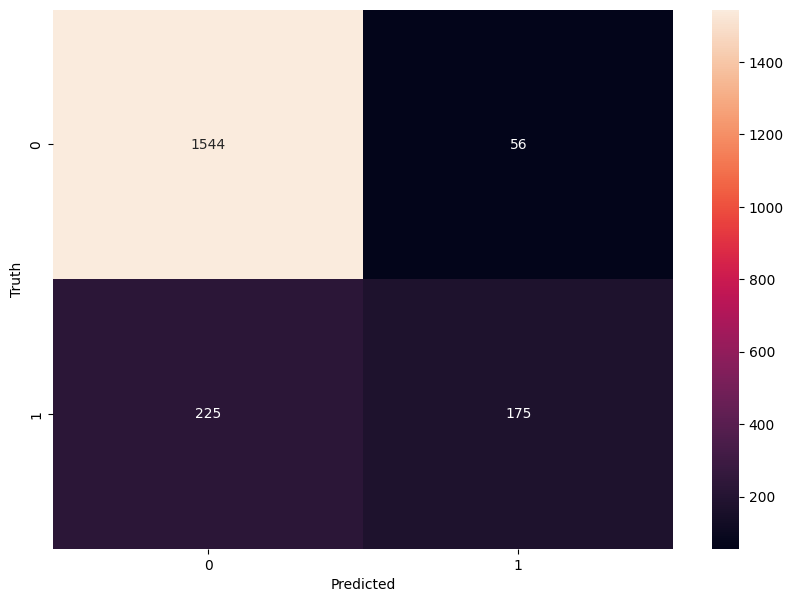

In [61]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1600
           1       0.76      0.44      0.55       400

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

